In [26]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [27]:
stock = pd.read_csv("C:/Users/GC/stock.csv")

In [28]:
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [29]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [30]:
stock['Name'].value_counts()

흥국에프엔비      494
엘오티베큠       494
셀트리온헬스케어    494
오디텍         494
이엔플러스       494
           ... 
모비데이즈       494
한국쉘석유       494
네패스         494
대주산업        494
인터로조        494
Name: Name, Length: 2000, dtype: int64

In [31]:
stock_AJ = stock[stock['Code']=='A060310']

In [32]:
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [33]:
stock_AJ

,Date,Open,High,Low,Close,Volume
0,20210601,2890,2970,2885,2920,166690
2000,20210602,2915,2975,2830,2900,134833
4000,20210603,2900,2925,2875,2900,144470
6000,20210604,2930,3120,2920,2950,934224
8000,20210607,3000,3150,2955,3150,946560
...,...,...,...,...,...,...
978000,20230523,2300,2315,2260,2285,117084
980000,20230524,2280,2300,2255,2280,67101
982000,20230525,2260,2285,2235,2245,91789
984000,20230526,2245,2915,2230,2910,13590249


In [34]:
stock_AJ['Date'].value_counts()

20220928    1
20211108    1
20220512    1
20220511    1
20220510    1
           ..
20230412    1
20230411    1
20230410    1
20230407    1
20220927    1
Name: Date, Length: 494, dtype: int64

In [35]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [36]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
0,0.362534,0.347349,0.420705,0.001621
2000,0.372311,0.349177,0.396476,0.001207
4000,0.366445,0.330896,0.416300,0.001332
6000,0.378178,0.402194,0.436123,0.011601
8000,0.405553,0.413163,0.451542,0.011761
...,...,...,...,...
978000,0.131795,0.107861,0.145374,0.000976
980000,0.123973,0.102377,0.143172,0.000326
982000,0.116152,0.096892,0.134361,0.000647
984000,0.110285,0.327239,0.132159,0.176155


In [37]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.388270,0.371748,0.428200,0.011022
std,0.223416,0.216861,0.243649,0.053506
min,0.000000,0.000000,0.000000,0.000000
25%,0.158193,0.154022,0.174559,0.001332
50%,0.390888,0.384826,0.431718,0.002464
75%,0.534611,0.504113,0.583700,0.005128
max,1.000000,1.000000,1.000000,1.000000


In [38]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [39]:
window_size = 20

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.12006257332342345, 0.09506398537129565, 0.12995594713083897, 0.0003577772826598893], [0.10833007430159054, 0.0840950639823, 0.11233480175716587, 0.0009727870310734309], [0.09855299178339645, 0.08775137111196522, 0.11894273127229328, 0.0007246039889027013], [0.11028549080522936, 0.09872029250096087, 0.13656387664596636, 0.0011905842931963296], [0.13179507234525636, 0.10603290676029131, 0.1519823788479303, 0.0026100045850412784], [0.12983965584161755, 0.11517367458445435, 0.14096916298938464, 0.0014869269114462914], [0.13179507234525636, 0.10786106032512392, 0.14537444933280289, 0.0009760245403724937], [0.12397340633070109, 0.10237659963062609, 0.14317180616109376, 0.0003261433062557933], [0.11615174031614581, 0.09689213893612826, 0.1343612334742572, 0.0006471378025419926], [0.11028549080522936, 0.32723948810503695, 0.1321585903025481, 0.1761547272524533]] -> [0.39539347407311354]


In [40]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [41]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [43]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 20)            2000      
                                                                 
 dropout_2 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 [==============================] - 2s 5ms/step - loss: 0.2630
Epoch 2/70
12/12 [==============================] - 0s 5ms/step - loss: 0.1780
Epoch 3/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0778
Epoch 4/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 5/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 6/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 7/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 8/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 9/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 10/70
12/12 [==============================] - 0s 6ms/step - loss: 0.0115
Epoch 11/70
12/12 [==============================] - 0s 6ms/step - loss: 0.0121
Epoch 12/70
12/12 [==============================] - 0s 6ms/step - loss: 0.0119
Epoch 13/70
12/12 [==============================

In [51]:
model.evaluate(test_X, test_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.0029


0.0029111357871443033

5/5 [==============================] - 0s 3ms/step


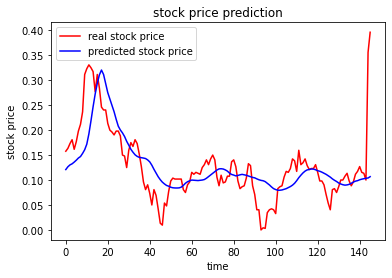

In [52]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()
